# Servicios Web y APIs 

## Índice
1. [API Air Quality](#air)
2. [API de OpenWeather](#wea)

En este Notebook vamos a llamar a diversas APIs. Antes de comenzar, es importante destacar dos conceptos:  

1) **Codificación de URLs**: Toda cadena de cadena de caracteres que se introduzca en una URL tiene que codificarse adecuadamente. En Python, podemos utilizar la función `quote()` del paquete `urllib.parse`

In [1]:
import urllib.parse
urllib.parse.quote(' ')

'%20'

In [2]:
urllib.parse.quote('ñ')

'%C3%B1'

2) **Peticiones HTTP**: la librería `requests` es la más utilizada para realizar peticiones HTTP en Python, permitiendo utilizar los métodos más comunes de este protocolo (GET, POST, PUT, etc.). Para más información entra en este [enlace](https://realpython.com/python-requests/)

También podemos utilizar la librería `urllib.request`

<a id="air"></a>
## API Air Quality

Esta API abierta proporciona información acerca de la calidad del aire en diversas ciudades. La documentación se encuentra en https://docs.openaq.org  

En primer lugar vamos a llamar a la API **cities**, la cual nos informa de las ciudades disponibles

In [9]:
import urllib.request
import json

url1 = 'https://api.openaq.org/v1/cities'

pais = input('Introduzca las siglas del país (ES para españa): ')

url2 = url1 + '?country=' + pais # Si quisieramosponer más filtros se anidarían con &

datos = urllib.request.urlopen(url2).read()

js = json.loads(datos)

for k in range(50):
    city = js['results'][k]['name']
    print(city)

Introduzca las siglas del país (ES para españa):  ES


A Coruña
Albacete
Alicante/Alacant
Almería
Araba/Álava
Asturias
Ávila
Badajoz
Barcelona
Bizkaia
Burgos
Cáceres
Cádiz
Cantabria
Carboneras
Castellón/Castelló
CCAA Catalu�a
CCAA Com. Valenciana
CCAA Galicia
CCAA Pa�s Vasco
Ciudad Real
Córdoba
Cuenca
Gipuzkoa
Girona
Granada
Guadalajara
Huelva
Huesca
Illes Balears
Jaén
La Rioja
Las Palmas
León
Lleida
Lugo
Madrid
Malaga
Málaga
Marbella
Murcia
Navarra
Niebla
Ourense
Palencia
Pontevedra
Salamanca
Santa Cruz de Tenerife
Segovia
Sevilla


Esto mismo podemos realizarlo con la librería `requests`

In [14]:
import requests

url1 = 'https://api.openaq.org/v1/cities'

pais = input('Introduzca las siglas del país (ES para españa): ')

datos = requests.get(url1, params={'country':pais})

js = datos.json()

for k in range(50):
    city = js['results'][k]['name']
    print(city)

Introduzca las siglas del país (ES para españa):  ES


A Coruña
Albacete
Alicante/Alacant
Almería
Araba/Álava
Asturias
Ávila
Badajoz
Barcelona
Bizkaia
Burgos
Cáceres
Cádiz
Cantabria
Carboneras
Castellón/Castelló
CCAA Catalu�a
CCAA Com. Valenciana
CCAA Galicia
CCAA Pa�s Vasco
Ciudad Real
Córdoba
Cuenca
Gipuzkoa
Girona
Granada
Guadalajara
Huelva
Huesca
Illes Balears
Jaén
La Rioja
Las Palmas
León
Lleida
Lugo
Madrid
Malaga
Málaga
Marbella
Murcia
Navarra
Niebla
Ourense
Palencia
Pontevedra
Salamanca
Santa Cruz de Tenerife
Segovia
Sevilla


A continuación, llamamos a la API **latest**, que devuelve los últimos registros de una ciudad o país en concreto

In [27]:
url1 = 'https://api.openaq.org/v1/latest'

ciudad = input('Introduzca el nombre deuna ciudad: ')


url2 = url1 + '?city=' + urllib.parse.quote(ciudad) + '&limit=1'

print(url2)

data = urllib.request.urlopen(url2).read()

js = json.loads(data)

for r in range(len(js['results'][0]['measurements'])):
    valor = js['results'][0]['measurements'][r]['value']
    parametro = js['results'][0]['measurements'][r]['parameter']
    unidades = js['results'][0]['measurements'][r]['unit']
    fecha = js['results'][0]['measurements'][r]['lastUpdated']
    
    print ('El valor de ', parametro,' en ', ciudad, 'es de ', valor, unidades,
           '. Medida fue tomada el ', fecha)

Introduzca el nombre deuna ciudad:  Madrid


https://api.openaq.org/v1/latest?city=Madrid&limit=1
El valor de  no2  en  Madrid es de  20 µg/m³ . Medida fue tomada el  2021-03-22T17:00:00Z
El valor de  o3  en  Madrid es de  72 µg/m³ . Medida fue tomada el  2021-03-22T17:00:00Z
El valor de  pm10  en  Madrid es de  10 µg/m³ . Medida fue tomada el  2021-03-22T17:00:00Z
El valor de  pm25  en  Madrid es de  4 µg/m³ . Medida fue tomada el  2021-03-22T17:00:00Z


Parseamos el JSON de respuesta para obtener todos los niveles disponibles y la fecha de las mediciones

<a id="wea"></a>
## API de OpenWeather

Esta API permite obtener información climática. Puedes encontrar la documentación en https://openweathermap.org/api.   
Para obtener la API key hay que registrar un email válido, al cual será enviada la clave.  

Vamos a obtener la predicción de velocidad del viento para una ciudad a través de [esta API](https://openweathermap.org/forecast5)

In [48]:
import urllib.request
import urllib
import json

api_key = '3886d5996f84c5b9a5c953b027fc2306'

#api_key = 'ad4906e30e39b8e5b1d68504ec70b547'

ciudad = 'Crevillente,ES'

url = 'https://api.openweathermap.org/data/2.5/forecast?q=' + urllib.parse.quote(ciudad) + '&appid=' + api_key 
print(url)

data = urllib.request.urlopen(url).read()

js = json.loads(data)

ts = []
speed = []

for el in js['list']:
    speed.append(el['wind']['speed'])
    ts.append(el['dt_txt'])

https://api.openweathermap.org/data/2.5/forecast?q=Crevillente%2CES&appid=3886d5996f84c5b9a5c953b027fc2306


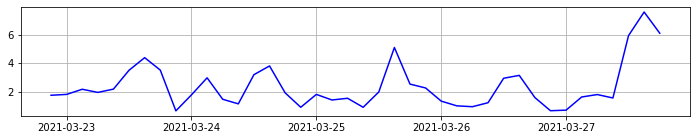

In [46]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
 
ts2 = [datetime.strptime(d,'%Y-%m-%d %H:%M:%S') for d in ts]
fig = plt.figure(figsize=(12,2))
plt.grid()

plt.plot(ts2,speed,color='blue');

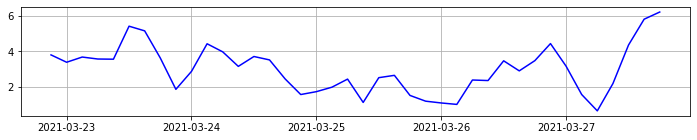

In [40]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
 
ts2 = [datetime.strptime(d,'%Y-%m-%d %H:%M:%S') for d in ts]
fig = plt.figure(figsize=(12,2))
plt.grid()

plt.plot(ts2,speed,color='blue');